In [1]:
import pandas as pd

In [2]:
유치원 = pd.read_csv('유치원.csv',encoding= 'cp949')
유치원

,구,년,유치원
0,종로구,2010,17
1,종로구,2011,17
2,종로구,2012,17
3,종로구,2013,17
4,종로구,2014,17
...,...,...,...
270,강동구,2016,35
271,강동구,2017,35
272,강동구,2018,35
273,강동구,2019,32


In [3]:
분기 = pd.read_csv('분기.csv', encoding = ('cp949'))

유치원 = 유치원.sort_values(by=['구','년'], axis=0).reset_index()

유치원.drop('index', axis = 1,inplace=True)

유치원2 = 유치원.copy()
유치원3 = 유치원.copy()
유치원4 = 유치원.copy()
유치원 = pd.concat([유치원,유치원2,유치원3, 유치원4], ignore_index=True).sort_values(by=['구','년'], axis=0).reset_index()

유치원.drop('index', axis = 1,inplace=True)

유치원 = pd.concat([유치원,분기], ignore_index=True, axis=1)


유치원.rename(columns = {유치원.columns[0]:'구'}, inplace = True)
유치원.rename(columns = {유치원.columns[1]:'년'}, inplace = True)
유치원.rename(columns = {유치원.columns[2]:'유치원'}, inplace = True)
유치원.rename(columns = {유치원.columns[3]:'분기'}, inplace = True)

유치원

,구,년,유치원,분기
0,강남구,2010,33,1
1,강남구,2010,33,2
2,강남구,2010,33,3
3,강남구,2010,33,4
4,강남구,2011,33,1
...,...,...,...,...
1095,중랑구,2019,31,4
1096,중랑구,2020,31,1
1097,중랑구,2020,31,2
1098,중랑구,2020,31,3


In [4]:
def kh(x):
    return x[:-1]

유치원['구'] = 유치원['구'].apply(kh)
유치원

,구,년,유치원,분기
0,강남,2010,33,1
1,강남,2010,33,2
2,강남,2010,33,3
3,강남,2010,33,4
4,강남,2011,33,1
...,...,...,...,...
1095,중랑,2019,31,4
1096,중랑,2020,31,1
1097,중랑,2020,31,2
1098,중랑,2020,31,3


# 경기종합지수

In [5]:
경기종합지수 = pd.read_csv('경기종합지수.csv',encoding = 'cp949')
경기종합지수.head()

,년,분기,선행종합지수,동행종합지수,후행종합지수,선행지수순환변동치,동행지수순환변동치
0,2010,1,82.6,82.3,81.8,102.4,99.3
1,2010,1,82.8,82.9,82.2,102.3,99.7
2,2010,1,82.9,83.5,82.5,102.1,100.0
3,2010,2,83.0,84.1,82.8,101.9,100.3
4,2010,2,83.2,84.7,83.0,101.9,100.7


In [6]:
경기종합지수 = 경기종합지수.groupby(['년','분기'])['선행종합지수','동행종합지수','후행종합지수','선행지수순환변동치','동행지수순환변동치'].agg(lambda x : round(x.mean(),1)).reset_index()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [7]:
경기종합지수.head()

,년,분기,선행종합지수,동행종합지수,후행종합지수,선행지수순환변동치,동행지수순환변동치
0,2010,1,82.8,82.9,82.2,102.3,99.7
1,2010,2,83.2,84.6,83.0,101.9,100.6
2,2010,3,83.8,85.5,83.8,101.7,100.6
3,2010,4,84.0,85.6,84.6,100.9,99.8
4,2011,1,85.0,87.2,85.7,101.2,100.7


# 고령인구수

In [8]:
고령인구수 = pd.read_csv('고령인구수.csv',encoding = 'cp949')
고령인구수.head()

,구,년,월,65세이상인구
0,종로구,2010,1,20629
1,종로구,2010,2,20698
2,종로구,2010,3,20729
3,종로구,2010,4,20815
4,종로구,2010,5,20876


In [9]:
def quarter(x):
    if x == 1 or x == 2 or x == 3:
        return int(1)
    elif x == 4 or x == 5 or x == 6:
        return int(2)
    elif x == 7 or x == 8 or x == 9:
        return int(3)
    elif x == 10 or x == 11 or x == 12:
        return int(4)
    else:
        return x

In [10]:
고령인구수.월 = 고령인구수.월.apply(quarter)
고령인구수 = 고령인구수.rename(columns = {'월':'분기'})
고령인구수.head()

,구,년,분기,65세이상인구
0,종로구,2010,1,20629
1,종로구,2010,1,20698
2,종로구,2010,1,20729
3,종로구,2010,2,20815
4,종로구,2010,2,20876


In [11]:
고령인구수 = 고령인구수.groupby(['구','년','분기'])['65세이상인구'].agg(lambda x : round(x.mean(),1)).reset_index()
고령인구수.head()

,구,년,분기,65세이상인구
0,강남구,2010,1,41526.7
1,강남구,2010,2,42051.7
2,강남구,2010,3,42451.3
3,강남구,2010,4,44048.0
4,강남구,2011,1,44485.3


In [12]:
def kh(x):
    return x[:-1]

고령인구수['구'] = 고령인구수['구'].apply(kh)
고령인구수

,구,년,분기,65세이상인구
0,강남,2010,1,41526.7
1,강남,2010,2,42051.7
2,강남,2010,3,42451.3
3,강남,2010,4,44048.0
4,강남,2011,1,44485.3
...,...,...,...,...
1045,중랑,2019,2,63257.0
1046,중랑,2019,3,64110.0
1047,중랑,2019,4,64834.0
1048,중랑,2020,1,66067.7


# 기준금리

In [13]:
기준금리 = pd.read_csv('기준 금리.csv',encoding = 'cp949')
기준금리.head()

,년,월,일,기준금리
0,2010,7,9,2.25
1,2010,11,16,2.50
2,2011,1,13,2.75
3,2011,3,10,3.00
4,2011,6,10,3.25


In [14]:
기준금리.월 = 기준금리.월.apply(quarter)
기준금리 = 기준금리.rename(columns = {'월':'분기'})
기준금리.head()

,년,분기,일,기준금리
0,2010,3,9,2.25
1,2010,4,16,2.50
2,2011,1,13,2.75
3,2011,1,10,3.00
4,2011,2,10,3.25


In [15]:
기준금리 = 기준금리.groupby(['년','분기'])['기준금리'].agg(lambda x : round(x.mean(),1)).reset_index()
기준금리.head()

,년,분기,기준금리
0,2010,3,2.2
1,2010,4,2.5
2,2011,1,2.9
3,2011,2,3.2
4,2012,3,3.0


# 소비자 물가 지수

In [16]:
소비자물가지수 = pd.read_csv('소비자물가지수.csv',encoding = 'cp949')
소비자물가지수.head()

,년,분기,소비자물가지수
0,2010,1,88.974
1,2010,1,89.154
2,2010,1,89.515
3,2010,2,89.875
4,2010,2,89.875


In [17]:
소비자물가지수 = 소비자물가지수.groupby(['년','분기'])['소비자물가지수'].agg(lambda x : round(x.mean(),1)).reset_index()
소비자물가지수.head()

,년,분기,소비자물가지수
0,2010,1,89.2
1,2010,2,89.8
2,2010,3,90.5
3,2010,4,91.0
4,2011,1,92.5


# 의료 기관

In [18]:
의료기관 = pd.read_csv('의료기관.csv',encoding = 'cp949')
의료기관.head()

,구,년,분기,전입인구
0,강남구,2010,1,2536
1,강남구,2010,2,2578
2,강남구,2010,3,2606
3,강남구,2010,4,2620
4,강남구,2011,1,2663


In [19]:
def kh(x):
    return x[:-1]

의료기관['구'] = 의료기관['구'].apply(kh)
의료기관

,구,년,분기,전입인구
0,강남,2010,1,2536
1,강남,2010,2,2578
2,강남,2010,3,2606
3,강남,2010,4,2620
4,강남,2011,1,2663
...,...,...,...,...
1020,금천,2019,1,472
1021,금천,2019,2,471
1022,금천,2019,3,473
1023,금천,2019,4,475


# 인구 데이터

In [20]:
인구 = pd.read_csv('인구데이터.csv',encoding = 'cp949')
인구.head()

,구,동,년,분기,총인구수,세대수,세대당 인구수,남자 인구수,여자 인구수,남여 비율
0,강남,개포1동,2010,1,22078,8128,2,10608,11470,0.93
1,강남,개포1동,2010,2,21982,8078,2,10553,11429,0.92
2,강남,개포1동,2010,3,21875,8036,2,10484,11390,0.92
3,강남,개포1동,2010,4,22005,8171,2,10543,11462,0.92
4,강남,개포1동,2011,1,21880,8131,2,10498,11381,0.92


In [21]:
인구 = 인구.query('동 != "전체"')

In [22]:
len(인구.query('구 == "강동"')['동'].unique())

18

In [23]:
인구.query('구 == "양천"')['동'].unique()

array(['목1동', '목2동', '목3동', '목4동', '목5동', '신월1동', '신월2동', '신월3동', '신월4동',
       '신월5동', '신월6동', '신월7동', '신정1동', '신정2동', '신정3동', '신정4동', '신정6동',
       '신정7동'], dtype=object)

In [24]:
def r(x):
    if x == '명륜3가동':
        return '혜화동'
    elif x == '신당제1동':
        return '신당동'
    elif x == '신당제2동':
        return '다산동'
    elif x == '신당제3동':
        return '약수동'
    elif x == '신당제4동':
        return '청구동'
    elif x == '신당제6동':
        return '동화동'
    elif x == '번1동':
        return '번제1동'
    elif x == '번2동':
        return '번제2동'
    elif x == '번3동':
        return '번제3동'
    elif x == '수유1동':
        return '수유제1동'
    elif x == '수유2동':
        return '수유제2동'
    elif x == '수유3동':
        return '수유제3동'
    elif x == '공릉1동':
        return '공릉1.3동'
    else:
        return x    

In [25]:
인구.동 = 인구.동.apply(r)
인구

,구,동,년,분기,총인구수,세대수,세대당 인구수,남자 인구수,여자 인구수,남여 비율
0,강남,개포1동,2010,1,22078,8128,2,10608,11470,0.93
1,강남,개포1동,2010,2,21982,8078,2,10553,11429,0.92
2,강남,개포1동,2010,3,21875,8036,2,10484,11390,0.92
3,강남,개포1동,2010,4,22005,8171,2,10543,11462,0.92
4,강남,개포1동,2011,1,21880,8131,2,10498,11381,0.92
...,...,...,...,...,...,...,...,...,...,...
18967,중랑,중화제2동,2019,2,27918,14423,1,14379,13538,1.06
18968,중랑,중화제2동,2019,3,27585,14347,1,14186,13398,1.06
18969,중랑,중화제2동,2019,4,26977,14169,1,13895,13082,1.06
18970,중랑,중화제2동,2020,1,26415,13995,1,13610,12805,1.06


In [26]:
len(인구.query('구 == "강동"')['동'].unique())

18

In [27]:
인구.to_csv('인구.csv',index=False)

In [28]:
인구 = pd.read_csv('인구.csv')
인구.head()

,구,동,년,분기,총인구수,세대수,세대당 인구수,남자 인구수,여자 인구수,남여 비율
0,강남,개포1동,2010,1,22078,8128,2,10608,11470,0.93
1,강남,개포1동,2010,2,21982,8078,2,10553,11429,0.92
2,강남,개포1동,2010,3,21875,8036,2,10484,11390,0.92
3,강남,개포1동,2010,4,22005,8171,2,10543,11462,0.92
4,강남,개포1동,2011,1,21880,8131,2,10498,11381,0.92


# 구동 만들기

In [29]:
구동 = 인구.drop_duplicates(['구','동'])[['구','동']].reset_index()
del 구동['index']
구동.head(10)

,구,동
0,강남,개포1동
1,강남,개포2동
2,강남,개포4동
3,강남,논현1동
4,강남,논현2동
5,강남,대치1동
6,강남,대치2동
7,강남,대치4동
8,강남,도곡1동
9,강남,도곡2동


In [30]:
구동.to_csv('구_동.csv',index=False)

# 자가용

In [31]:
자가용 = pd.read_csv('자가용.csv')
자가용.head()

,구,년,월,자가용
0,종로구,2010,1,"46,578"
1,중구,2010,1,"46,963"
2,용산구,2010,1,"72,848"
3,성동구,2010,1,"80,655"
4,광진구,2010,1,"88,270"


In [ ]:
자가용.월 = 자가용.월.apply(quarter)
자가용 = 자가용.rename(columns = {'월':'분기'})
자가용.head()

In [ ]:
자가용.자가용 = 자가용.자가용.apply(lambda x: int(x.replace(',','')))
자가용.head()

In [34]:
자가용 = 자가용.groupby(['구','년','분기'])['자가용'].agg(lambda x : round(x.mean(),1)).reset_index()
자가용.head()

,구,년,분기,자가용
0,강남구,2010,1,225123.0
1,강남구,2010,2,217731.0
2,강남구,2010,3,216630.3
3,강남구,2010,4,217944.0
4,강남구,2011,1,217726.2


In [35]:
def kh(x):
    return x[:-1]

자가용['구'] = 자가용['구'].apply(kh)
자가용

,구,년,분기,자가용
0,강남,2010,1,225123.0
1,강남,2010,2,217731.0
2,강남,2010,3,216630.3
3,강남,2010,4,217944.0
4,강남,2011,1,217726.2
...,...,...,...,...
1045,중랑,2019,2,103563.0
1046,중랑,2019,3,103237.0
1047,중랑,2019,4,102884.0
1048,중랑,2020,1,102615.3


# 재정자립도

In [37]:
재정자립도 = pd.read_csv('재정자립도.csv',encoding = 'cp949')
재정자립도

,구,년,재정자립도
0,종로구,2010,78.5
1,종로구,2011,72.1
2,종로구,2012,65.7
3,종로구,2013,61.0
4,종로구,2014,61.1
...,...,...,...
270,강동구,2016,33.0
271,강동구,2017,34.8
272,강동구,2018,33.6
273,강동구,2019,41.1


In [37]:
분기 = pd.read_csv('분기.csv', encoding = ('cp949'))

재정자립도 = 재정자립도.sort_values(by=['구','년'], axis=0).reset_index()

재정자립도.drop('index', axis = 1,inplace=True)

재정자립도2 = 재정자립도.copy()
재정자립도3 = 재정자립도.copy()
재정자립도4 = 재정자립도.copy()
재정자립도 = pd.concat([재정자립도,재정자립도2,재정자립도3, 재정자립도4], ignore_index=True).sort_values(by=['구','년'], axis=0).reset_index()

재정자립도.drop('index', axis = 1,inplace=True)

재정자립도 = pd.concat([재정자립도,분기], ignore_index=True, axis=1)


재정자립도.rename(columns = {재정자립도.columns[0]:'구'}, inplace = True)
재정자립도.rename(columns = {재정자립도.columns[1]:'년'}, inplace = True)
재정자립도.rename(columns = {재정자립도.columns[2]:'재정자립도'}, inplace = True)
재정자립도.rename(columns = {재정자립도.columns[3]:'분기'}, inplace = True)

재정자립도

,구,년,재정자립도,분기
0,강남구,2010,77.1,1
1,강남구,2010,77.1,2
2,강남구,2010,77.1,3
3,강남구,2010,77.1,4
4,강남구,2011,82.8,1
...,...,...,...,...
1095,중랑구,2019,25.2,4
1096,중랑구,2020,24.9,1
1097,중랑구,2020,24.9,2
1098,중랑구,2020,24.9,3


In [38]:
재정자립도 = 재정자립도.groupby(['구','년','분기'])['재정자립도'].agg(lambda x : round(x.mean(),1)).reset_index()
재정자립도.head()

,구,년,분기,재정자립도
0,강남구,2010,1,77.1
1,강남구,2010,2,77.1
2,강남구,2010,3,77.1
3,강남구,2010,4,77.1
4,강남구,2011,1,82.8


In [39]:
def kh(x):
    return x[:-1]

재정자립도['구'] = 재정자립도['구'].apply(kh)
재정자립도

,구,년,분기,재정자립도
0,강남,2010,1,77.1
1,강남,2010,2,77.1
2,강남,2010,3,77.1
3,강남,2010,4,77.1
4,강남,2011,1,82.8
...,...,...,...,...
1095,중랑,2019,4,25.2
1096,중랑,2020,1,24.9
1097,중랑,2020,2,24.9
1098,중랑,2020,3,24.9


# 전입인구

In [40]:
전입인구 = pd.read_csv('전입 인구.csv',encoding = 'cp949')
전입인구.head()

,구,년,분기,전입인구
0,종로구,2010,1,8296
1,종로구,2010,2,7333
2,종로구,2010,3,6406
3,종로구,2010,4,7173
4,종로구,2011,1,7935


In [41]:
def kh(x):
    return x[:-1]

전입인구['구'] = 전입인구['구'].apply(kh)
전입인구

,구,년,분기,전입인구
0,종로,2010,1,8296
1,종로,2010,2,7333
2,종로,2010,3,6406
3,종로,2010,4,7173
4,종로,2011,1,7935
...,...,...,...,...
1020,강동,2019,1,14615
1021,강동,2019,2,13096
1022,강동,2019,3,17507
1023,강동,2019,4,29883


# 전출인구

In [42]:
전출인구 = pd.read_csv('전출 인구.csv',encoding = 'cp949')
전출인구.head()

,구,년,월,전출인구
0,종로구,2010,1,2087
1,종로구,2010,2,2999
2,종로구,2010,3,3850
3,종로구,2010,4,3006
4,종로구,2010,5,2756


In [43]:
전출인구.월 = 전출인구.월.apply(quarter)
전출인구 = 전출인구.rename(columns = {'월':'분기'})
전출인구.head()

,구,년,분기,전출인구
0,종로구,2010,1,2087
1,종로구,2010,1,2999
2,종로구,2010,1,3850
3,종로구,2010,2,3006
4,종로구,2010,2,2756


In [44]:
전출인구 = 전출인구.groupby(['구','년','분기'])['전출인구'].agg(lambda x : round(x.mean(),1)).reset_index()
전출인구.head()

,구,년,분기,전출인구
0,강남구,2010,1,11056.3
1,강남구,2010,2,9305.3
2,강남구,2010,3,8527.0
3,강남구,2010,4,9416.3
4,강남구,2011,1,11255.3


In [45]:
def kh(x):
    return x[:-1]

전출인구['구'] = 전출인구['구'].apply(kh)
전출인구

,구,년,분기,전출인구
0,강남,2010,1,11056.3
1,강남,2010,2,9305.3
2,강남,2010,3,8527.0
3,강남,2010,4,9416.3
4,강남,2011,1,11255.3
...,...,...,...,...
1045,중랑,2019,2,4511.3
1046,중랑,2019,3,4466.0
1047,중랑,2019,4,5139.0
1048,중랑,2020,1,5356.3


# 주택가격지수

In [46]:
주택가격지수 = pd.read_csv('주택가격지수.csv',encoding = 'cp949')
주택가격지수.head()

,구,년,월,지수,변동
0,종로구,2010,1,92.556,0.17
1,중구,2010,1,98.477,-0.05
2,용산구,2010,1,104.603,0.02
3,성동구,2010,1,92.588,0.02
4,광진구,2010,1,94.480,0.10


In [47]:
주택가격지수.월 = 주택가격지수.월.apply(quarter)
주택가격지수 = 주택가격지수.rename(columns = {'월':'분기'})
주택가격지수.head()

,구,년,분기,지수,변동
0,종로구,2010,1,92.556,0.17
1,중구,2010,1,98.477,-0.05
2,용산구,2010,1,104.603,0.02
3,성동구,2010,1,92.588,0.02
4,광진구,2010,1,94.480,0.10


In [48]:
주택가격지수 = 주택가격지수.groupby(['구','년','분기'])['지수','변동'].agg(lambda x : round(x.mean(),1)).reset_index()
주택가격지수.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,구,년,분기,지수,변동
0,강남구,2010,1,93.4,0.2
1,강남구,2010,2,92.9,-0.4
2,강남구,2010,3,91.7,-0.3
3,강남구,2010,4,91.4,0.0
4,강남구,2011,1,92.1,0.3


In [49]:
def kh(x):
    return x[:-1]

주택가격지수['구'] = 주택가격지수['구'].apply(kh)
주택가격지수

,구,년,분기,지수,변동
0,강남,2010,1,93.4,0.2
1,강남,2010,2,92.9,-0.4
2,강남,2010,3,91.7,-0.3
3,강남,2010,4,91.4,0.0
4,강남,2011,1,92.1,0.3
...,...,...,...,...,...
1045,중랑,2019,2,103.8,-0.1
1046,중랑,2019,3,103.7,0.0
1047,중랑,2019,4,104.5,0.3
1048,중랑,2020,1,105.2,0.2


# 지하철 정보

In [50]:
지하철 = pd.read_csv('지하철 정보.csv',encoding = 'cp949')
지하철.head()

,구,동,년,월,역,호선
0,강남구,수서동,2010,2,수서역,3
1,송파구,가락본동,2010,2,가락시장역,3
2,송파구,가락본동,2010,2,경찰병원역,3
3,송파구,가락동,2010,2,오금역,3
4,중랑구,상봉동,2010,12,상봉역,경춘선


In [51]:
지하철.월 = 지하철.월.apply(quarter)
지하철 = 지하철.rename(columns = {'월':'분기'})
지하철.head()

,구,동,년,분기,역,호선
0,강남구,수서동,2010,1,수서역,3
1,송파구,가락본동,2010,1,가락시장역,3
2,송파구,가락본동,2010,1,경찰병원역,3
3,송파구,가락동,2010,1,오금역,3
4,중랑구,상봉동,2010,4,상봉역,경춘선


# 콜 금리

In [52]:
콜금리 = pd.read_csv('콜 금리.csv',encoding = 'cp949')
콜금리.head()

,년,월,일,콜금리
0,2010,1,4,1.98
1,2010,1,5,1.98
2,2010,1,6,1.96
3,2010,1,7,1.99
4,2010,1,8,2.00


In [53]:
콜금리.월 = 콜금리.월.apply(quarter)
콜금리 = 콜금리.rename(columns = {'월':'분기'})
콜금리.head()

,년,분기,일,콜금리
0,2010,1,4,1.98
1,2010,1,5,1.98
2,2010,1,6,1.96
3,2010,1,7,1.99
4,2010,1,8,2.00


In [54]:
콜금리 = 콜금리.groupby(['년','분기'])['콜금리'].agg(lambda x : round(x.mean(),1)).reset_index()
콜금리.head()

,년,분기,콜금리
0,2010,1,2.0
1,2010,2,2.0
2,2010,3,2.2
3,2010,4,2.4
4,2011,1,2.8


# 통화량

In [55]:
통화량 = pd.read_csv('통화량.csv')
통화량.head()

,년,분기,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf
0,2010,1,"36,986.2","65,054.7","381,218.2","1,574,215.8","2,019,563.5"
1,2010,1,"39,591.6","66,563.8","387,858.6","1,595,403.8","2,041,164.1"
2,2010,1,"38,171.8","65,643.6","386,015.4","1,607,896.1","2,056,233.7"
3,2010,2,"37,726.8","64,274.7","388,174.7","1,621,176.9","2,069,616.1"
4,2010,2,"38,763.8","67,835.1","394,880.2","1,630,904.7","2,084,007.4"


In [56]:
통화량.화폐발행잔액 = 통화량.화폐발행잔액.apply(lambda x: x.replace(',',''))
통화량.head()

,년,분기,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf
0,2010,1,36986.2,"65,054.7","381,218.2","1,574,215.8","2,019,563.5"
1,2010,1,39591.6,"66,563.8","387,858.6","1,595,403.8","2,041,164.1"
2,2010,1,38171.8,"65,643.6","386,015.4","1,607,896.1","2,056,233.7"
3,2010,2,37726.8,"64,274.7","388,174.7","1,621,176.9","2,069,616.1"
4,2010,2,38763.8,"67,835.1","394,880.2","1,630,904.7","2,084,007.4"


In [57]:
통화량.본원통화 = 통화량.본원통화.apply(lambda x: x.replace(',',''))
통화량.head()

,년,분기,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf
0,2010,1,36986.2,65054.7,"381,218.2","1,574,215.8","2,019,563.5"
1,2010,1,39591.6,66563.8,"387,858.6","1,595,403.8","2,041,164.1"
2,2010,1,38171.8,65643.6,"386,015.4","1,607,896.1","2,056,233.7"
3,2010,2,37726.8,64274.7,"388,174.7","1,621,176.9","2,069,616.1"
4,2010,2,38763.8,67835.1,"394,880.2","1,630,904.7","2,084,007.4"


In [58]:
통화량['M1(협의통화)'] = 통화량['M1(협의통화)'].apply(lambda x: x.replace(',',''))
통화량.head()

,년,분기,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf
0,2010,1,36986.2,65054.7,381218.2,"1,574,215.8","2,019,563.5"
1,2010,1,39591.6,66563.8,387858.6,"1,595,403.8","2,041,164.1"
2,2010,1,38171.8,65643.6,386015.4,"1,607,896.1","2,056,233.7"
3,2010,2,37726.8,64274.7,388174.7,"1,621,176.9","2,069,616.1"
4,2010,2,38763.8,67835.1,394880.2,"1,630,904.7","2,084,007.4"


In [59]:
통화량['M2(광의통화)'] = 통화량['M2(광의통화)'].apply(lambda x: x.replace(',',''))
통화량.head()

,년,분기,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf
0,2010,1,36986.2,65054.7,381218.2,1574215.8,"2,019,563.5"
1,2010,1,39591.6,66563.8,387858.6,1595403.8,"2,041,164.1"
2,2010,1,38171.8,65643.6,386015.4,1607896.1,"2,056,233.7"
3,2010,2,37726.8,64274.7,388174.7,1621176.9,"2,069,616.1"
4,2010,2,38763.8,67835.1,394880.2,1630904.7,"2,084,007.4"


In [60]:
통화량['Lf'] = 통화량['Lf'].apply(lambda x: x.replace(',',''))
통화량.head()

,년,분기,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf
0,2010,1,36986.2,65054.7,381218.2,1574215.8,2019563.5
1,2010,1,39591.6,66563.8,387858.6,1595403.8,2041164.1
2,2010,1,38171.8,65643.6,386015.4,1607896.1,2056233.7
3,2010,2,37726.8,64274.7,388174.7,1621176.9,2069616.1
4,2010,2,38763.8,67835.1,394880.2,1630904.7,2084007.4


In [61]:
통화량[['화폐발행잔액', '본원통화','M1(협의통화)','M2(광의통화)','Lf']] = 통화량[['화폐발행잔액', '본원통화','M1(협의통화)','M2(광의통화)','Lf']].apply(pd.to_numeric)

In [62]:
통화량 = 통화량.groupby(['년','분기'])['화폐발행잔액','본원통화','M1(협의통화)','M2(광의통화)','Lf'].agg(lambda x : round(x.mean(),1)).reset_index()
통화량.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,년,분기,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf
0,2010,1,38249.9,65754.0,385030.7,1592505.2,2038987.1
1,2010,2,38523.8,66120.2,394395.9,1633354.3,2086115.8
2,2010,3,40337.4,68181.1,403027.0,1655454.9,2116094.4
3,2010,4,41935.9,70284.9,415195.6,1677386.1,2144923.1
4,2011,1,44919.5,73995.2,430929.2,1676105.1,2151240.5


In [81]:
통화량

,년,분기,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf
0,2010,1,38249.9,65754.0,385030.7,1592505.2,2038987.1
1,2010,2,38523.8,66120.2,394395.9,1633354.3,2086115.8
2,2010,3,40337.4,68181.1,403027.0,1655454.9,2116094.4
3,2010,4,41935.9,70284.9,415195.6,1677386.1,2144923.1
4,2011,1,44919.5,73995.2,430929.2,1676105.1,2151240.5
5,2011,2,44390.0,73913.4,423766.8,1690846.5,2176451.1
6,2011,3,46161.4,75884.7,422272.9,1718140.1,2227666.5
7,2011,4,47462.0,77134.8,425731.4,1750846.4,2277323.5
8,2012,1,50218.4,80786.2,438874.1,1764406.7,2311820.6
9,2012,2,50050.5,80997.8,439283.9,1786105.6,2361498.6


# 데이터 합치기

- 구 합치기

In [63]:
유치원 = pd.merge(유치원, 구동,on='구',how='left')
유치원

,구,년,유치원,분기,동
0,강남,2010,33,1,개포1동
1,강남,2010,33,1,개포2동
2,강남,2010,33,1,개포4동
3,강남,2010,33,1,논현1동
4,강남,2010,33,1,논현2동
...,...,...,...,...,...
18695,중랑,2020,31,4,상봉제2동
18696,중랑,2020,31,4,신내1동
18697,중랑,2020,31,4,신내2동
18698,중랑,2020,31,4,중화제1동


In [64]:
의료기관 = pd.merge(의료기관, 구동,on='구',how='left')
의료기관 = 의료기관.rename(columns={'전입인구':'의료기관'})
의료기관

,구,년,분기,의료기관,동
0,강남,2010,1,2536,개포1동
1,강남,2010,1,2536,개포2동
2,강남,2010,1,2536,개포4동
3,강남,2010,1,2536,논현1동
4,강남,2010,1,2536,논현2동
...,...,...,...,...,...
17420,금천,2020,1,479,시흥제1동
17421,금천,2020,1,479,시흥제2동
17422,금천,2020,1,479,시흥제3동
17423,금천,2020,1,479,시흥제4동


In [65]:
재정자립도 = pd.merge(재정자립도, 구동,on='구',how='left')
재정자립도

,구,년,분기,재정자립도,동
0,강남,2010,1,77.1,개포1동
1,강남,2010,1,77.1,개포2동
2,강남,2010,1,77.1,개포4동
3,강남,2010,1,77.1,논현1동
4,강남,2010,1,77.1,논현2동
...,...,...,...,...,...
18695,중랑,2020,4,24.9,상봉제2동
18696,중랑,2020,4,24.9,신내1동
18697,중랑,2020,4,24.9,신내2동
18698,중랑,2020,4,24.9,중화제1동


In [66]:
고령인구수 = pd.merge(고령인구수, 구동,on='구',how='left')
고령인구수

,구,년,분기,65세이상인구,동
0,강남,2010,1,41526.7,개포1동
1,강남,2010,1,41526.7,개포2동
2,강남,2010,1,41526.7,개포4동
3,강남,2010,1,41526.7,논현1동
4,강남,2010,1,41526.7,논현2동
...,...,...,...,...,...
17845,중랑,2020,2,67248.7,상봉제2동
17846,중랑,2020,2,67248.7,신내1동
17847,중랑,2020,2,67248.7,신내2동
17848,중랑,2020,2,67248.7,중화제1동


In [67]:
전입인구 = pd.merge(전입인구, 구동,on='구',how='left')
전입인구

,구,년,분기,전입인구,동
0,종로,2010,1,8296,가회동
1,종로,2010,1,8296,교남동
2,종로,2010,1,8296,혜화동
3,종로,2010,1,8296,무악동
4,종로,2010,1,8296,부암동
...,...,...,...,...,...
17420,강동,2020,1,39833,암사제2동
17421,강동,2020,1,39833,암사제3동
17422,강동,2020,1,39833,천호제1동
17423,강동,2020,1,39833,천호제2동


In [68]:
전출인구 = pd.merge(전출인구, 구동,on='구',how='left')
전출인구

,구,년,분기,전출인구,동
0,강남,2010,1,11056.3,개포1동
1,강남,2010,1,11056.3,개포2동
2,강남,2010,1,11056.3,개포4동
3,강남,2010,1,11056.3,논현1동
4,강남,2010,1,11056.3,논현2동
...,...,...,...,...,...
17845,중랑,2020,2,4951.5,상봉제2동
17846,중랑,2020,2,4951.5,신내1동
17847,중랑,2020,2,4951.5,신내2동
17848,중랑,2020,2,4951.5,중화제1동


In [69]:
자가용 = pd.merge(자가용, 구동,on='구',how='left')
자가용

,구,년,분기,자가용,동
0,강남,2010,1,225123.0,개포1동
1,강남,2010,1,225123.0,개포2동
2,강남,2010,1,225123.0,개포4동
3,강남,2010,1,225123.0,논현1동
4,강남,2010,1,225123.0,논현2동
...,...,...,...,...,...
17845,중랑,2020,2,102399.5,상봉제2동
17846,중랑,2020,2,102399.5,신내1동
17847,중랑,2020,2,102399.5,신내2동
17848,중랑,2020,2,102399.5,중화제1동


In [70]:
주택가격지수 = pd.merge(주택가격지수,구동,on='구',how='left')
주택가격지수

,구,년,분기,지수,변동,동
0,강남,2010,1,93.4,0.2,개포1동
1,강남,2010,1,93.4,0.2,개포2동
2,강남,2010,1,93.4,0.2,개포4동
3,강남,2010,1,93.4,0.2,논현1동
4,강남,2010,1,93.4,0.2,논현2동
...,...,...,...,...,...,...
17845,중랑,2020,2,105.5,0.1,상봉제2동
17846,중랑,2020,2,105.5,0.1,신내1동
17847,중랑,2020,2,105.5,0.1,신내2동
17848,중랑,2020,2,105.5,0.1,중화제1동


- 데이터 합치기

In [71]:
df = pd.merge(의료기관,전입인구,on=['구','동','년','분기']).merge(전출인구,on=['구','동','년','분기']).merge(자가용,on=['구','동','년','분기']).merge(고령인구수,on=['구','동','년','분기']).merge(재정자립도,on=['구','동','년','분기']).merge(주택가격지수,on=['구','동','년','분기']).merge(유치원,on=['구','동','년','분기'])
df

,구,년,분기,의료기관,동,전입인구,전출인구,자가용,65세이상인구,재정자립도,지수,변동,유치원
0,강남,2010,1,2536,개포1동,33089,11056.3,225123.0,41526.7,77.1,93.4,0.2,33
1,강남,2010,1,2536,개포2동,33089,11056.3,225123.0,41526.7,77.1,93.4,0.2,33
2,강남,2010,1,2536,개포4동,33089,11056.3,225123.0,41526.7,77.1,93.4,0.2,33
3,강남,2010,1,2536,논현1동,33089,11056.3,225123.0,41526.7,77.1,93.4,0.2,33
4,강남,2010,1,2536,논현2동,33089,11056.3,225123.0,41526.7,77.1,93.4,0.2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17420,금천,2020,1,479,시흥제1동,9595,3264.0,81474.3,37650.7,30.0,106.2,0.2,19
17421,금천,2020,1,479,시흥제2동,9595,3264.0,81474.3,37650.7,30.0,106.2,0.2,19
17422,금천,2020,1,479,시흥제3동,9595,3264.0,81474.3,37650.7,30.0,106.2,0.2,19
17423,금천,2020,1,479,시흥제4동,9595,3264.0,81474.3,37650.7,30.0,106.2,0.2,19


- 시간 데이터 합치기

In [72]:
df_1 = pd.merge(경기종합지수,소비자물가지수, on =['년','분기']).merge(통화량,on =['년','분기']).merge(콜금리, on = ['년','분기']).merge(기준금리, on =['년','분기'],how='left')
df_1.ffill(axis=0,inplace=True)
df_1 = df_1.fillna(2.0)
df_1

,년,분기,선행종합지수,동행종합지수,후행종합지수,선행지수순환변동치,동행지수순환변동치,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리
0,2010,1,82.8,82.9,82.2,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
1,2010,2,83.2,84.6,83.0,101.9,100.6,89.8,38523.8,66120.2,394395.9,1633354.3,2086115.8,2.0,2.0
2,2010,3,83.8,85.5,83.8,101.7,100.6,90.5,40337.4,68181.1,403027.0,1655454.9,2116094.4,2.2,2.2
3,2010,4,84.0,85.6,84.6,100.9,99.8,91.0,41935.9,70284.9,415195.6,1677386.1,2144923.1,2.4,2.5
4,2011,1,85.0,87.2,85.7,101.2,100.7,92.5,44919.5,73995.2,430929.2,1676105.1,2151240.5,2.8,2.9
5,2011,2,85.4,88.0,87.0,100.9,100.7,93.2,44390.0,73913.4,423766.8,1690846.5,2176451.1,3.1,3.2
6,2011,3,85.7,89.0,88.0,100.5,101.0,94.2,46161.4,75884.7,422272.9,1718140.1,2227666.5,3.3,3.2
7,2011,4,85.8,89.3,88.8,99.9,100.6,94.4,47462.0,77134.8,425731.4,1750846.4,2277323.5,3.3,3.2
8,2012,1,86.7,89.9,89.5,100.1,100.5,95.4,50218.4,80786.2,438874.1,1764406.7,2311820.6,3.3,3.2
9,2012,2,87.7,90.6,90.0,100.4,100.6,95.7,50050.5,80997.8,439283.9,1786105.6,2361498.6,3.3,3.2


In [73]:
구동_data = pd.merge(df,df_1,on=['년','분기'],how='left')
구동_data.head()

,구,년,분기,의료기관,동,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,선행지수순환변동치,동행지수순환변동치,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리
0,강남,2010,1,2536,개포1동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
1,강남,2010,1,2536,개포2동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
2,강남,2010,1,2536,개포4동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
3,강남,2010,1,2536,논현1동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
4,강남,2010,1,2536,논현2동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0


In [74]:
df_3 = df.groupby(['구','년','분기'])['의료기관','전입인구','전출인구','자가용','65세이상인구','재정자립도','지수','변동'].agg(lambda x : round(x.mean(),1)).reset_index()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [75]:
구_data = pd.merge(df_3,df_1,on=['년','분기'],how='left')
구_data

,구,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,지수,...,선행지수순환변동치,동행지수순환변동치,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리
0,강남,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,93.4,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
1,강남,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,92.9,...,101.9,100.6,89.8,38523.8,66120.2,394395.9,1633354.3,2086115.8,2.0,2.0
2,강남,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,91.7,...,101.7,100.6,90.5,40337.4,68181.1,403027.0,1655454.9,2116094.4,2.2,2.2
3,강남,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,91.4,...,100.9,99.8,91.0,41935.9,70284.9,415195.6,1677386.1,2144923.1,2.4,2.5
4,강남,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,92.1,...,101.2,100.7,92.5,44919.5,73995.2,430929.2,1676105.1,2151240.5,2.8,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,중랑,2019,1,672,12454,4527.7,103875.8,62345.7,25.2,104.2,...,99.5,99.9,104.8,118334.7,174435.9,855323.7,2733309.3,3859602.6,1.8,1.8
1021,중랑,2019,2,678,11868,4511.3,103563.0,63257.0,25.2,103.8,...,99.4,99.8,105.2,118312.0,177175.4,868863.4,2777979.7,3935112.8,1.7,1.8
1022,중랑,2019,3,687,11510,4466.0,103237.0,64110.0,25.2,103.7,...,99.0,99.9,105.2,120615.6,180068.4,879990.1,2832460.6,4021680.3,1.6,1.5
1023,중랑,2019,4,689,13614,5139.0,102884.0,64834.0,25.2,104.5,...,99.8,100.0,105.5,123479.4,184115.3,903590.6,2896025.2,4100150.3,1.3,1.2


In [76]:
구동_data.head()

,구,년,분기,의료기관,동,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,선행지수순환변동치,동행지수순환변동치,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리
0,강남,2010,1,2536,개포1동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
1,강남,2010,1,2536,개포2동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
2,강남,2010,1,2536,개포4동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
3,강남,2010,1,2536,논현1동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
4,강남,2010,1,2536,논현2동,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0


In [77]:
cols = 구동_data.columns.tolist()
tmp = cols[4] #11번째 column을

del cols[4]

cols.insert(1,tmp) #2번째 위치로

구동_data = 구동_data[cols]
구동_data

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,선행지수순환변동치,동행지수순환변동치,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
1,강남,개포2동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
2,강남,개포4동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
3,강남,논현1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
4,강남,논현2동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17420,금천,시흥제1동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8
17421,금천,시흥제2동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8
17422,금천,시흥제3동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8
17423,금천,시흥제4동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8


In [78]:
구_data.head()

,구,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,지수,...,선행지수순환변동치,동행지수순환변동치,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리
0,강남,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,93.4,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
1,강남,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,92.9,...,101.9,100.6,89.8,38523.8,66120.2,394395.9,1633354.3,2086115.8,2.0,2.0
2,강남,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,91.7,...,101.7,100.6,90.5,40337.4,68181.1,403027.0,1655454.9,2116094.4,2.2,2.2
3,강남,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,91.4,...,100.9,99.8,91.0,41935.9,70284.9,415195.6,1677386.1,2144923.1,2.4,2.5
4,강남,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,92.1,...,101.2,100.7,92.5,44919.5,73995.2,430929.2,1676105.1,2151240.5,2.8,2.9


In [80]:
구동_data

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,선행지수순환변동치,동행지수순환변동치,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
1,강남,개포2동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
2,강남,개포4동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
3,강남,논현1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
4,강남,논현2동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17420,금천,시흥제1동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8
17421,금천,시흥제2동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8
17422,금천,시흥제3동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8
17423,금천,시흥제4동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8


# 엑셀 만들기

In [ ]:
구_data.ti_csv('구.csv',index=False)

In [87]:
구동_data.to_csv('변동요인_data_구동.csv',index=False)

In [88]:
pd.read_csv('변동요인_data_구동.csv')

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,선행지수순환변동치,동행지수순환변동치,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
1,강남,개포2동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
2,강남,개포4동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
3,강남,논현1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
4,강남,논현2동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,102.3,99.7,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17420,금천,시흥제1동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8
17421,금천,시흥제2동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8
17422,금천,시흥제3동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8
17423,금천,시흥제4동,2020,1,479,9595,3264.0,81474.3,37650.7,30.0,...,100.0,99.6,106.0,129793.9,192957.2,963939.9,2955972.4,4181459.1,1.2,0.8


# 데이터 불러오기

In [11]:
변동요인_data_구동 = pd.read_csv('변동요인_data_구동.csv',encoding='cp949')
변동요인_data_구동 = 변동요인_data_구동.fillna('없음')

In [16]:
변동요인_data_구동 = 변동요인_data_구동.sort_values(by = ['구','동','년','분기']).reset_index()
del 변동요인_data_구동['index']
변동요인_data_구동

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리,new_sub_info,랜드마크
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0,없음,없음
1,강남,개포1동,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,...,89.8,38523.8,66120.2,394395.9,1633354.3,2086115.8,2.0,2.0,없음,없음
2,강남,개포1동,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,...,90.5,40337.4,68181.1,403027.0,1655454.9,2116094.4,2.2,2.2,없음,없음
3,강남,개포1동,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,...,91.0,41935.9,70284.9,415195.6,1677386.1,2144923.1,2.4,2.5,없음,없음
4,강남,개포1동,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,...,92.5,44919.5,73995.2,430929.2,1676105.1,2151240.5,2.8,2.9,없음,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17420,중랑,중화제2동,2019,1,672,12454,4527.7,103875.8,62345.7,25.2,...,104.8,118334.7,174435.9,855323.7,2733309.3,3859602.6,1.8,1.8,개통,없음
17421,중랑,중화제2동,2019,2,678,11868,4511.3,103563.0,63257.0,25.2,...,105.2,118312.0,177175.4,868863.4,2777979.7,3935112.8,1.7,1.8,개통,없음
17422,중랑,중화제2동,2019,3,687,11510,4466.0,103237.0,64110.0,25.2,...,105.2,120615.6,180068.4,879990.1,2832460.6,4021680.3,1.6,1.5,개통,없음
17423,중랑,중화제2동,2019,4,689,13614,5139.0,102884.0,64834.0,25.2,...,105.5,123479.4,184115.3,903590.6,2896025.2,4100150.3,1.3,1.2,개통,없음


In [17]:
변동요인_data_구동.to_csv('변동요인_data_구동.csv',index=False)

In [39]:
df = pd.read_csv('변동요인_data_구동.csv')
df.head()

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,소비자물가지수,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리,new_sub_info,랜드마크
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,89.2,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0,없음,없음
1,강남,개포1동,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,...,89.8,38523.8,66120.2,394395.9,1633354.3,2086115.8,2.0,2.0,없음,없음
2,강남,개포1동,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,...,90.5,40337.4,68181.1,403027.0,1655454.9,2116094.4,2.2,2.2,없음,없음
3,강남,개포1동,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,...,91.0,41935.9,70284.9,415195.6,1677386.1,2144923.1,2.4,2.5,없음,없음
4,강남,개포1동,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,...,92.5,44919.5,73995.2,430929.2,1676105.1,2151240.5,2.8,2.9,없음,없음


# 원 핫 인코딩

In [27]:
pd.get_dummies(df)

,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,지수,변동,...,랜드마크_고속버스터미널,랜드마크_김포공항,랜드마크_남산타워,랜드마크_롯데월드,랜드마크_서울월드컵경기장,랜드마크_야구장,랜드마크_없음,랜드마크_잠실야구장,랜드마크_코엑스,랜드마크_한강공원
0,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,93.4,0.2,...,0,0,0,0,0,0,1,0,0,0
1,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,92.9,-0.4,...,0,0,0,0,0,0,1,0,0,0
2,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,91.7,-0.3,...,0,0,0,0,0,0,1,0,0,0
3,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,91.4,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,92.1,0.3,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17420,2019,1,672,12454,4527.7,103875.8,62345.7,25.2,104.2,-0.2,...,0,0,0,0,0,0,1,0,0,0
17421,2019,2,678,11868,4511.3,103563.0,63257.0,25.2,103.8,-0.1,...,0,0,0,0,0,0,1,0,0,0
17422,2019,3,687,11510,4466.0,103237.0,64110.0,25.2,103.7,0.0,...,0,0,0,0,0,0,1,0,0,0
17423,2019,4,689,13614,5139.0,102884.0,64834.0,25.2,104.5,0.3,...,0,0,0,0,0,0,1,0,0,0


# 초,중,공

- 초등학교

In [42]:
초등학교 = pd.read_csv('초등학교수.csv',encoding='cp949')
초등학교 = 초등학교.fillna(0)
초등학교

,구,동,년,초등학교
0,종로구,청운효자동,2010,1.0
1,종로구,사직동,2010,0.0
2,종로구,삼청동,2010,0.0
3,종로구,부암동,2010,2.0
4,종로구,평창동,2010,0.0
...,...,...,...,...
4670,강동구,암사제2동,2020,2.0
4671,강동구,암사제3동,2020,0.0
4672,강동구,천호제1동,2020,2.0
4673,강동구,천호제2동,2020,1.0


In [45]:
초등학교.query('동=="개포1동"')

,구,동,년,초등학교
3938,강남구,개포1동,2010,1.0
3960,강남구,개포1동,2011,1.0
3982,강남구,개포1동,2012,1.0
4004,강남구,개포1동,2013,1.0
4026,강남구,개포1동,2014,1.0
4048,강남구,개포1동,2015,1.0
4070,강남구,개포1동,2016,1.0
4092,강남구,개포1동,2017,1.0
4114,강남구,개포1동,2018,1.0
4136,강남구,개포1동,2019,0.0


In [46]:
def kh(x):
    return x[:-1]

초등학교['구'] = 초등학교['구'].apply(kh)
초등학교

,구,동,년,초등학교
0,종로,청운효자동,2010,1.0
1,종로,사직동,2010,0.0
2,종로,삼청동,2010,0.0
3,종로,부암동,2010,2.0
4,종로,평창동,2010,0.0
...,...,...,...,...
4670,강동,암사제2동,2020,2.0
4671,강동,암사제3동,2020,0.0
4672,강동,천호제1동,2020,2.0
4673,강동,천호제2동,2020,1.0


In [51]:
df = pd.merge(df,초등학교,on=['구','동','년'],how='left')
df.head()

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,화폐발행잔액,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리,new_sub_info,랜드마크,초등학교
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,38249.9,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0,없음,없음,1.0
1,강남,개포1동,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,...,38523.8,66120.2,394395.9,1633354.3,2086115.8,2.0,2.0,없음,없음,1.0
2,강남,개포1동,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,...,40337.4,68181.1,403027.0,1655454.9,2116094.4,2.2,2.2,없음,없음,1.0
3,강남,개포1동,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,...,41935.9,70284.9,415195.6,1677386.1,2144923.1,2.4,2.5,없음,없음,1.0
4,강남,개포1동,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,...,44919.5,73995.2,430929.2,1676105.1,2151240.5,2.8,2.9,없음,없음,1.0


- 중학교

In [55]:
중학교 = pd.read_excel('중학교.xlsx',encoding='cp949')
중학교

,구,년,중학교
0,종로구,2010,2
1,중구,2010,4
2,용산구,2010,4
3,성동구,2010,10
4,광진구,2010,9
...,...,...,...
270,관악구,2020,16
271,서초구,2020,16
272,강남구,2020,24
273,송파구,2020,28


In [57]:
def kh(x):
    return x[:-1]

중학교['구'] = 중학교['구'].apply(kh)
중학교

,구,년,중학교
0,종로,2010,2
1,중,2010,4
2,용산,2010,4
3,성동,2010,10
4,광진,2010,9
...,...,...,...
270,관악,2020,16
271,서초,2020,16
272,강남,2020,24
273,송파,2020,28


In [59]:
df = pd.merge(df,중학교,on=['구','년'],how='left')
df.head()

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,본원통화,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리,new_sub_info,랜드마크,초등학교,중학교
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,65754.0,385030.7,1592505.2,2038987.1,2.0,2.0,없음,없음,1.0,17
1,강남,개포1동,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,...,66120.2,394395.9,1633354.3,2086115.8,2.0,2.0,없음,없음,1.0,17
2,강남,개포1동,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,...,68181.1,403027.0,1655454.9,2116094.4,2.2,2.2,없음,없음,1.0,17
3,강남,개포1동,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,...,70284.9,415195.6,1677386.1,2144923.1,2.4,2.5,없음,없음,1.0,17
4,강남,개포1동,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,...,73995.2,430929.2,1676105.1,2151240.5,2.8,2.9,없음,없음,1.0,17


- 고등학교

In [67]:
고등학교 = pd.read_csv('고등학교 수.csv',encoding='cp949')
고등학교 = 고등학교.fillna(0)
고등학교

,구,동,년,고등학교
0,강남구,개포1동,2010,0.0
1,강남구,개포2동,2010,3.0
2,강남구,개포4동,2010,1.0
3,강남구,논현1동,2010,0.0
4,강남구,논현2동,2010,0.0
...,...,...,...,...
4670,중랑구,상봉제2동,2020,0.0
4671,중랑구,신내1동,2020,0.0
4672,중랑구,신내2동,2020,0.0
4673,중랑구,중화제1동,2020,1.0


In [70]:
def kh(x):
    return x[:-1]

고등학교['구'] = 고등학교['구'].apply(kh)
고등학교

,구,동,년,고등학교
0,강남,개포1동,2010,0.0
1,강남,개포2동,2010,3.0
2,강남,개포4동,2010,1.0
3,강남,논현1동,2010,0.0
4,강남,논현2동,2010,0.0
...,...,...,...,...
4670,중랑,상봉제2동,2020,0.0
4671,중랑,신내1동,2020,0.0
4672,중랑,신내2동,2020,0.0
4673,중랑,중화제1동,2020,1.0


In [72]:
df = pd.merge(df,고등학교,on=['구','동','년'],how='left')
df

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,M1(협의통화),M2(광의통화),Lf,콜금리,기준금리,new_sub_info,랜드마크,초등학교,중학교,고등학교
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,385030.7,1592505.2,2038987.1,2.0,2.0,없음,없음,1.0,17,0.0
1,강남,개포1동,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,...,394395.9,1633354.3,2086115.8,2.0,2.0,없음,없음,1.0,17,0.0
2,강남,개포1동,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,...,403027.0,1655454.9,2116094.4,2.2,2.2,없음,없음,1.0,17,0.0
3,강남,개포1동,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,...,415195.6,1677386.1,2144923.1,2.4,2.5,없음,없음,1.0,17,0.0
4,강남,개포1동,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,...,430929.2,1676105.1,2151240.5,2.8,2.9,없음,없음,1.0,17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17420,중랑,중화제2동,2019,1,672,12454,4527.7,103875.8,62345.7,25.2,...,855323.7,2733309.3,3859602.6,1.8,1.8,개통,없음,0.0,14,0.0
17421,중랑,중화제2동,2019,2,678,11868,4511.3,103563.0,63257.0,25.2,...,868863.4,2777979.7,3935112.8,1.7,1.8,개통,없음,0.0,14,0.0
17422,중랑,중화제2동,2019,3,687,11510,4466.0,103237.0,64110.0,25.2,...,879990.1,2832460.6,4021680.3,1.6,1.5,개통,없음,0.0,14,0.0
17423,중랑,중화제2동,2019,4,689,13614,5139.0,102884.0,64834.0,25.2,...,903590.6,2896025.2,4100150.3,1.3,1.2,개통,없음,0.0,14,0.0


-  보건소 데이터 합치기

In [7]:
보건소 = pd.read_csv('보건소.csv',encoding='cp949')

def kh(x):
    return x[:-1]

보건소['구'] = 보건소['구'].apply(kh)
보건소


,구,동,년,보건소
0,강남,개포1동,2010,0.0
1,강남,개포2동,2010,0.0
2,강남,개포4동,2010,0.0
3,강남,논현1동,2010,0.0
4,강남,논현2동,2010,0.0
...,...,...,...,...
4670,중랑,상봉제2동,2020,0.0
4671,중랑,신내1동,2020,0.0
4672,중랑,신내2동,2020,1.0
4673,중랑,중화제1동,2020,0.0


In [9]:
df = pd.merge(df,보건소,on=['구','동','년'],how='left')
df = df.fillna(0)
df

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,M2(광의통화),Lf,콜금리,기준금리,new_sub_info,랜드마크,초등학교,중학교,고등학교,보건소
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,1592505.2,2038987.1,2.0,2.0,없음,없음,1.0,17,0.0,0.0
1,강남,개포1동,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,...,1633354.3,2086115.8,2.0,2.0,없음,없음,1.0,17,0.0,0.0
2,강남,개포1동,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,...,1655454.9,2116094.4,2.2,2.2,없음,없음,1.0,17,0.0,0.0
3,강남,개포1동,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,...,1677386.1,2144923.1,2.4,2.5,없음,없음,1.0,17,0.0,0.0
4,강남,개포1동,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,...,1676105.1,2151240.5,2.8,2.9,없음,없음,1.0,17,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17420,중랑,중화제2동,2019,1,672,12454,4527.7,103875.8,62345.7,25.2,...,2733309.3,3859602.6,1.8,1.8,개통,없음,0.0,14,0.0,0.0
17421,중랑,중화제2동,2019,2,678,11868,4511.3,103563.0,63257.0,25.2,...,2777979.7,3935112.8,1.7,1.8,개통,없음,0.0,14,0.0,0.0
17422,중랑,중화제2동,2019,3,687,11510,4466.0,103237.0,64110.0,25.2,...,2832460.6,4021680.3,1.6,1.5,개통,없음,0.0,14,0.0,0.0
17423,중랑,중화제2동,2019,4,689,13614,5139.0,102884.0,64834.0,25.2,...,2896025.2,4100150.3,1.3,1.2,개통,없음,0.0,14,0.0,0.0


- 데이터 재생성

In [10]:
df.to_csv('변동요인_data_구동.csv',index=False)

In [11]:
df = pd.read_csv('변동요인_data_구동.csv')
df.head()

,구,동,년,분기,의료기관,전입인구,전출인구,자가용,65세이상인구,재정자립도,...,M2(광의통화),Lf,콜금리,기준금리,new_sub_info,랜드마크,초등학교,중학교,고등학교,보건소
0,강남,개포1동,2010,1,2536,33089,11056.3,225123.0,41526.7,77.1,...,1592505.2,2038987.1,2.0,2.0,없음,없음,1.0,17,0.0,0.0
1,강남,개포1동,2010,2,2578,26169,9305.3,217731.0,42051.7,77.1,...,1633354.3,2086115.8,2.0,2.0,없음,없음,1.0,17,0.0,0.0
2,강남,개포1동,2010,3,2606,24183,8527.0,216630.3,42451.3,77.1,...,1655454.9,2116094.4,2.2,2.2,없음,없음,1.0,17,0.0,0.0
3,강남,개포1동,2010,4,2620,26685,9416.3,217944.0,44048.0,77.1,...,1677386.1,2144923.1,2.4,2.5,없음,없음,1.0,17,0.0,0.0
4,강남,개포1동,2011,1,2663,32153,11255.3,217726.2,44485.3,82.8,...,1676105.1,2151240.5,2.8,2.9,없음,없음,1.0,17,0.0,0.0


# 다중공선성 검사

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)    

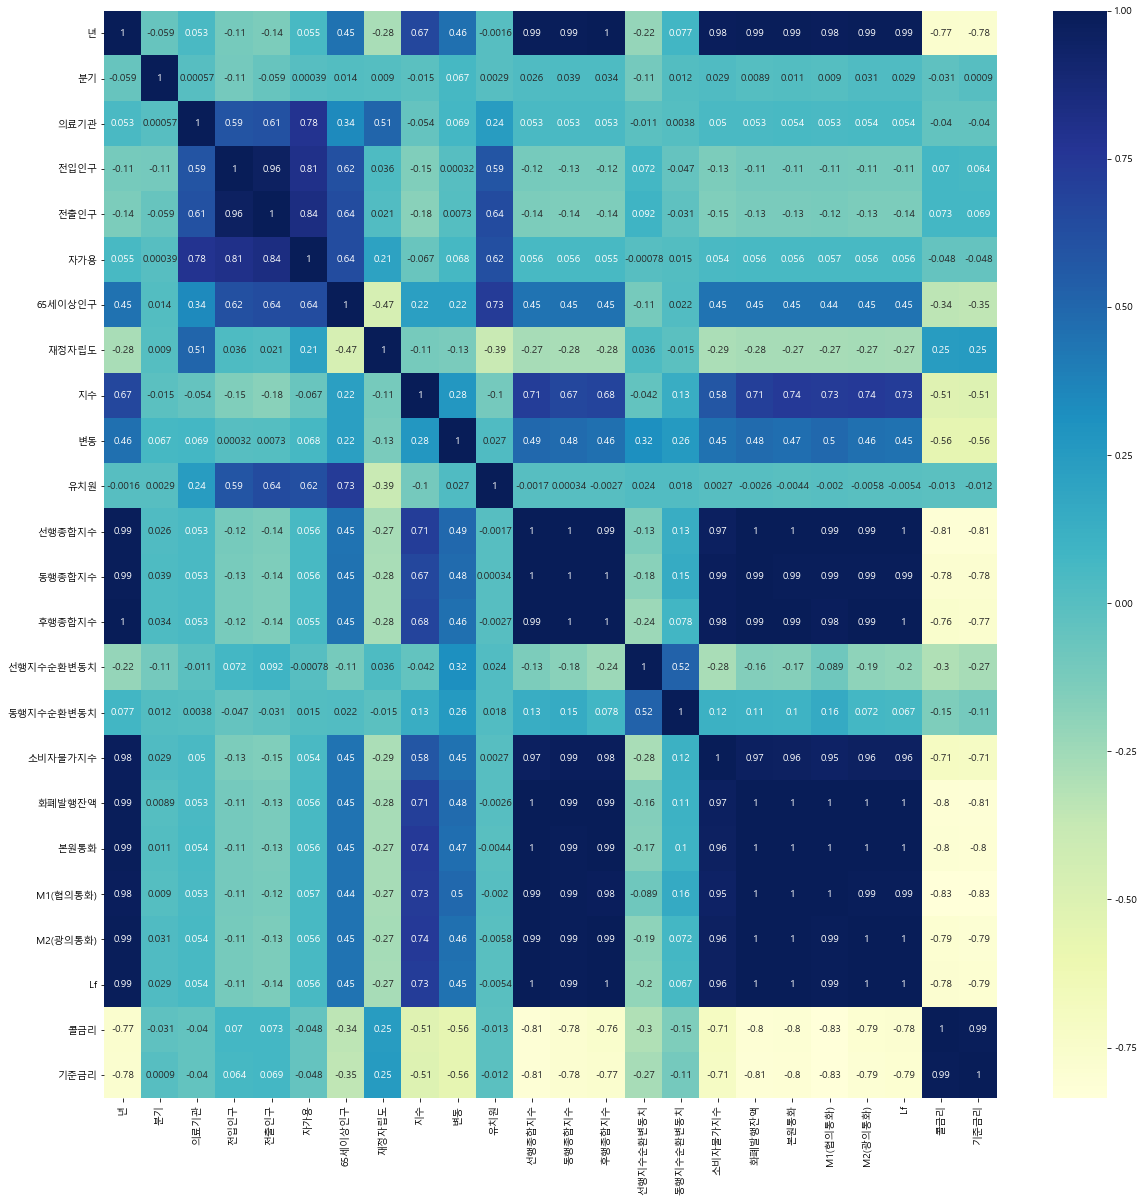

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,:].corr(), annot=True, cmap="YlGnBu")
plt.show()